In [ ]:
!pip install imbalanced-learn


In [ ]:
!pip install xgboost

In [ ]:
!pip install statsmodels


In [ ]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 828.7 kB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectPercentile, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve, confusion_matrix, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import category_encoders as ce
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('train.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Menghitung jumlah nilai 'yes' dan 'no' di kolom 'y'
value_counts_y = df['y'].value_counts()

# Menampilkan hasil
print("Jumlah nilai 'yes' dan 'no' di kolom 'y':")
print(value_counts_y)

Jumlah nilai 'yes' dan 'no' di kolom 'y':
y
no     39922
yes     5289
Name: count, dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.drop(columns=['duration'])

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

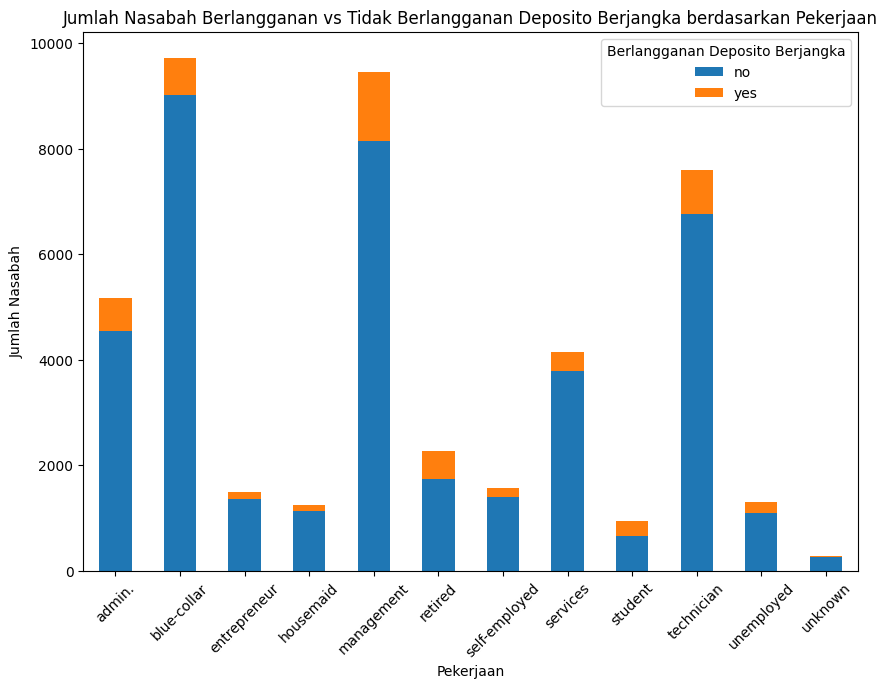

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap jenis pekerjaan
job_y_counts = df.groupby(['job', 'y']).size().unstack()

# Membuat grafik batang
job_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()


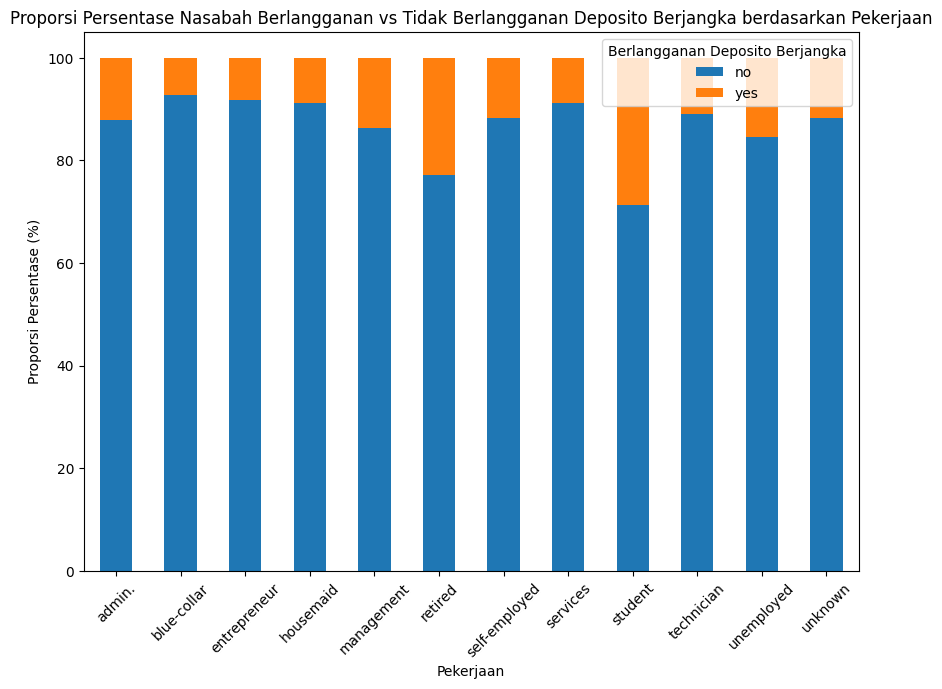

y                 no    yes
job                        
admin.         87.8%  12.2%
blue-collar    92.7%   7.3%
entrepreneur   91.7%   8.3%
housemaid      91.2%   8.8%
management     86.2%  13.8%
retired        77.2%  22.8%
self-employed  88.2%  11.8%
services       91.1%   8.9%
student        71.3%  28.7%
technician     88.9%  11.1%
unemployed     84.5%  15.5%
unknown        88.2%  11.8%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
job_y_percentages = job_y_counts.div(job_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
job_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
job_y_percentages = job_y_counts.div(job_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
job_y_percentages = job_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(job_y_percentages.to_string())


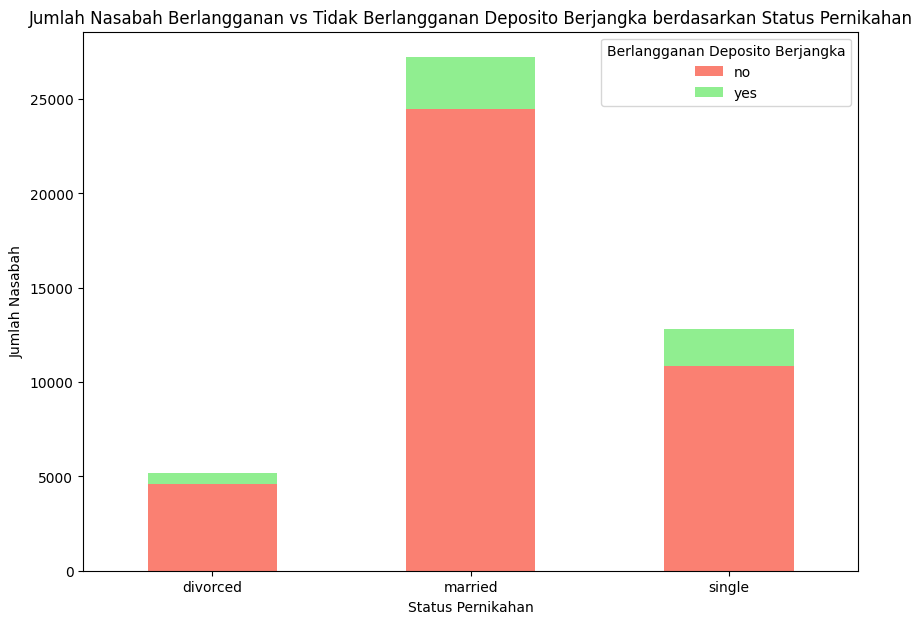

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap status pernikahan
marital_y_counts = df.groupby(['marital', 'y']).size().unstack()

# Membuat grafik batang
marital_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()


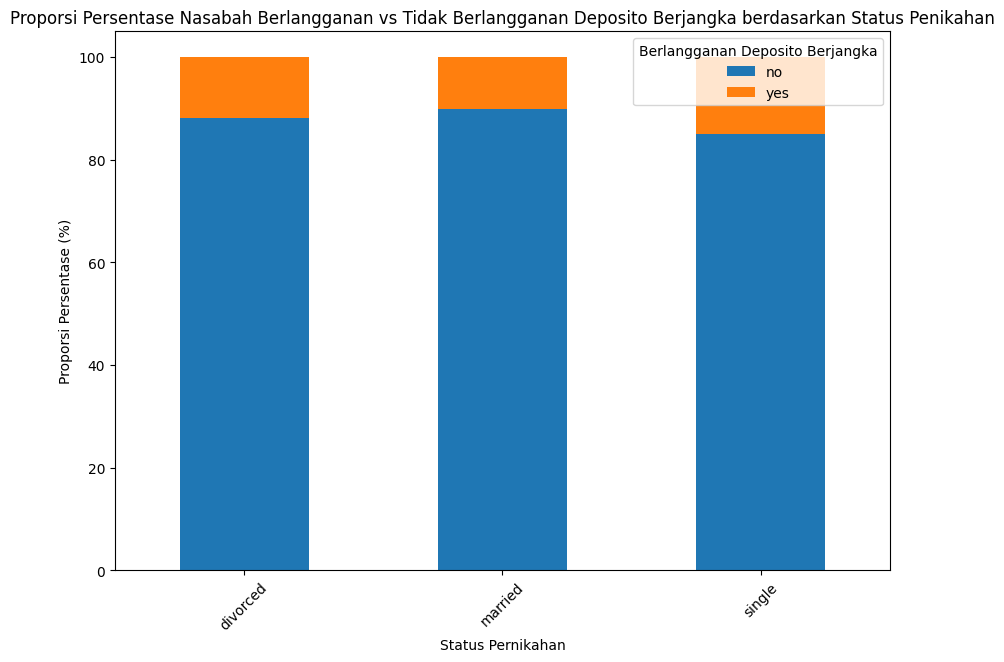

y            no    yes
marital               
divorced  88.1%  11.9%
married   89.9%  10.1%
single    85.1%  14.9%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
marital_y_percentages = marital_y_counts.div(marital_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
marital_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Status Penikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
marital_y_percentages = marital_y_counts.div(marital_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
marital_y_percentages = marital_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(marital_y_percentages.to_string())


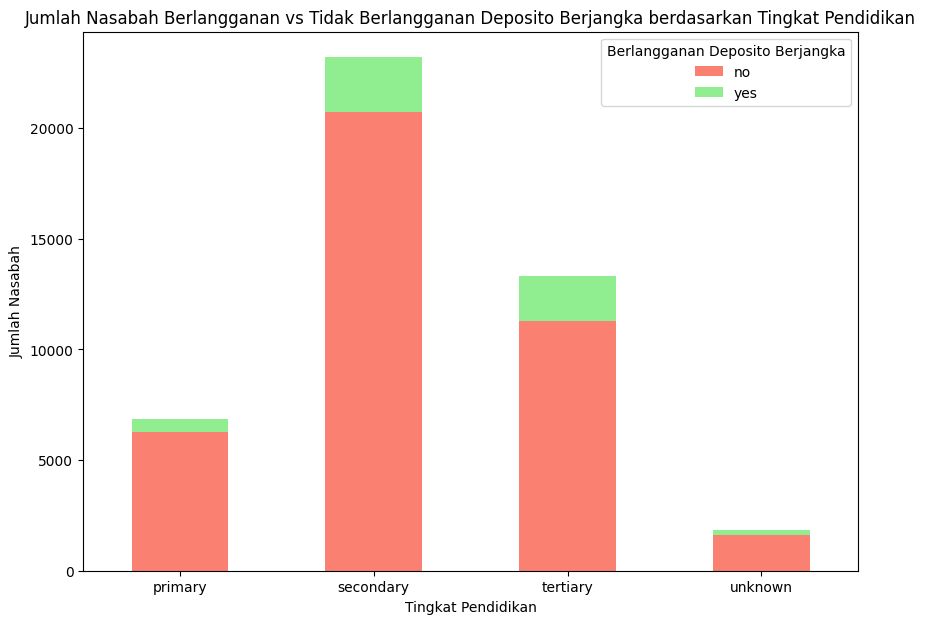

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap tingkat pendidikan
education_y_counts = df.groupby(['education', 'y']).size().unstack()

# Membuat grafik batang
education_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()


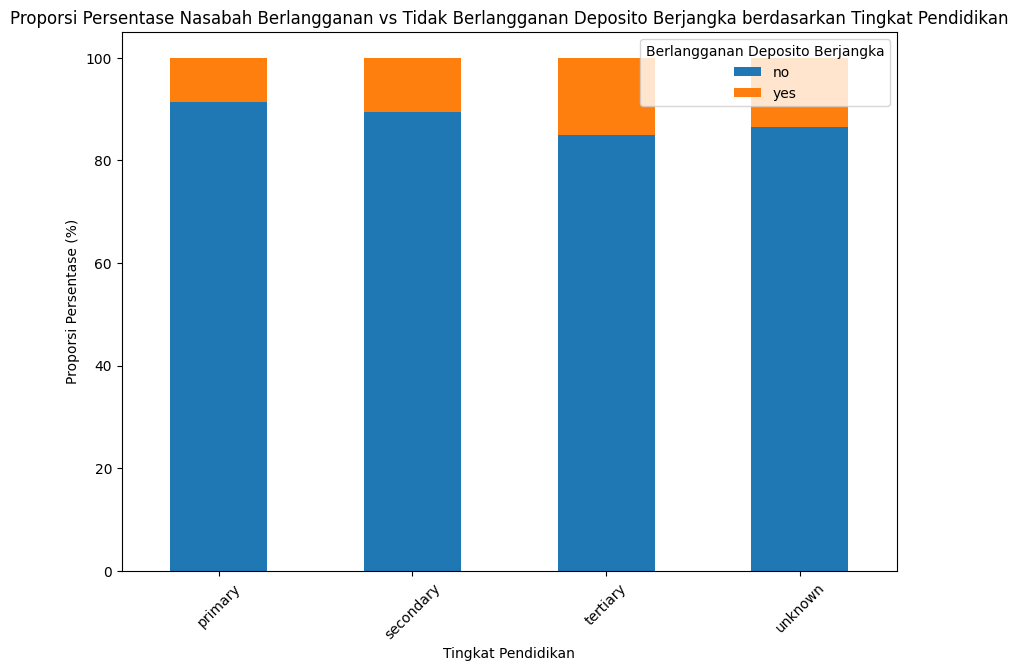

y             no    yes
education              
primary    91.4%   8.6%
secondary  89.4%  10.6%
tertiary   85.0%  15.0%
unknown    86.4%  13.6%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
education_y_percentages = education_y_counts.div(education_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
education_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
education_y_percentages =education_y_counts.div(education_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
education_y_percentages = education_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(education_y_percentages.to_string())


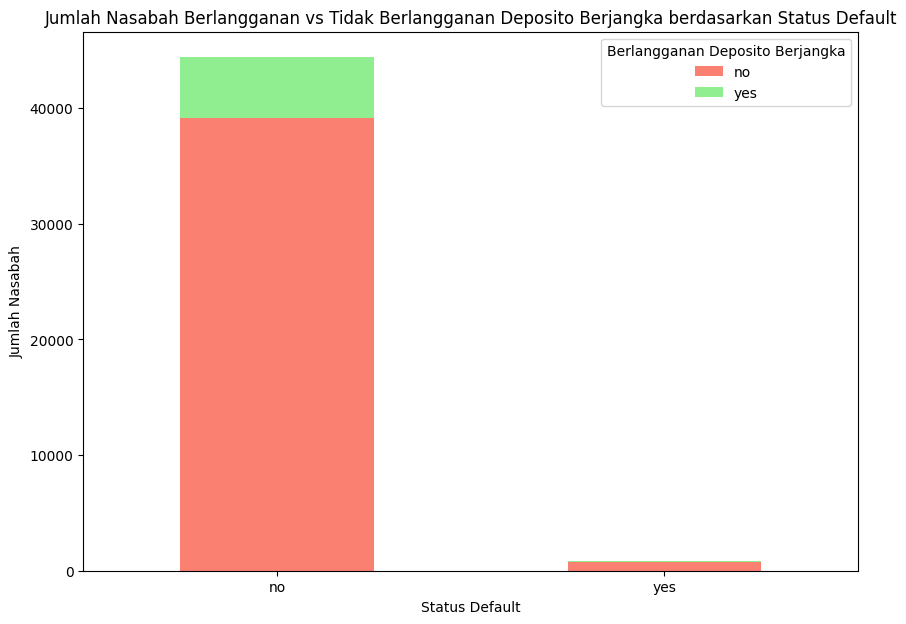

Chi-Square Statistic: 22.20224995571685
p-value: 2.4538606753508344e-06
Degrees of Freedom: 1
Expected Frequencies:
[[39202.34261574  5193.65738426]
 [  719.65738426    95.34261574]]
Tolak H0 (Ada hubungan yang signifikan antara default dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap status default
default_y_counts = df.groupby(['default', 'y']).size().unstack()

# Membuat grafik batang
default_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Status Default')
plt.xlabel('Status Default')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['default'], df['y'])

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Memeriksa hasil hipotesis nol
if p > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara default dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara default dan y)')


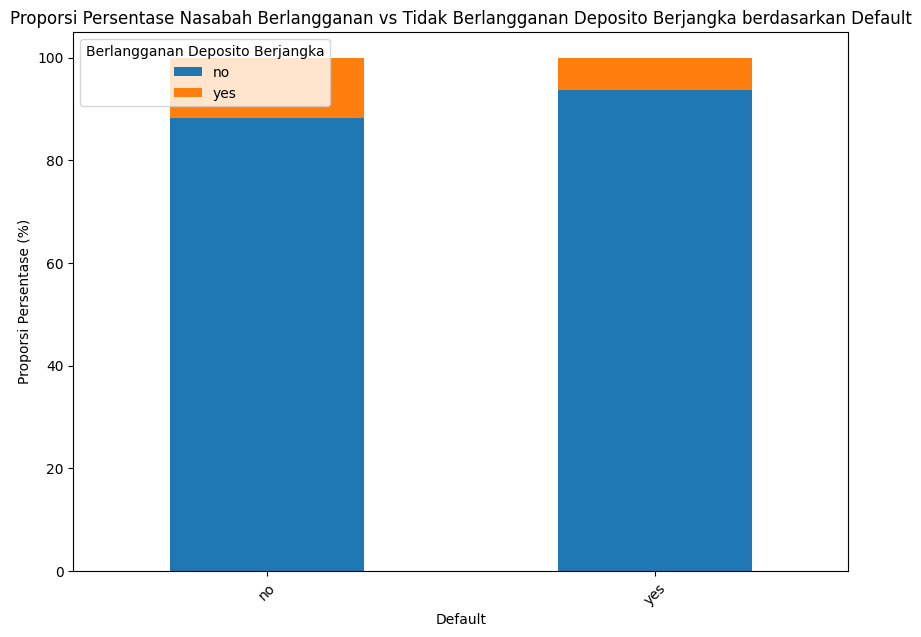

y           no    yes
default              
no       88.2%  11.8%
yes      93.6%   6.4%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
default_y_percentages = default_y_counts.div(default_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
default_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Default')
plt.xlabel('Default')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
default_y_percentages =default_y_counts.div(default_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
default_y_percentages = default_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(default_y_percentages.to_string())


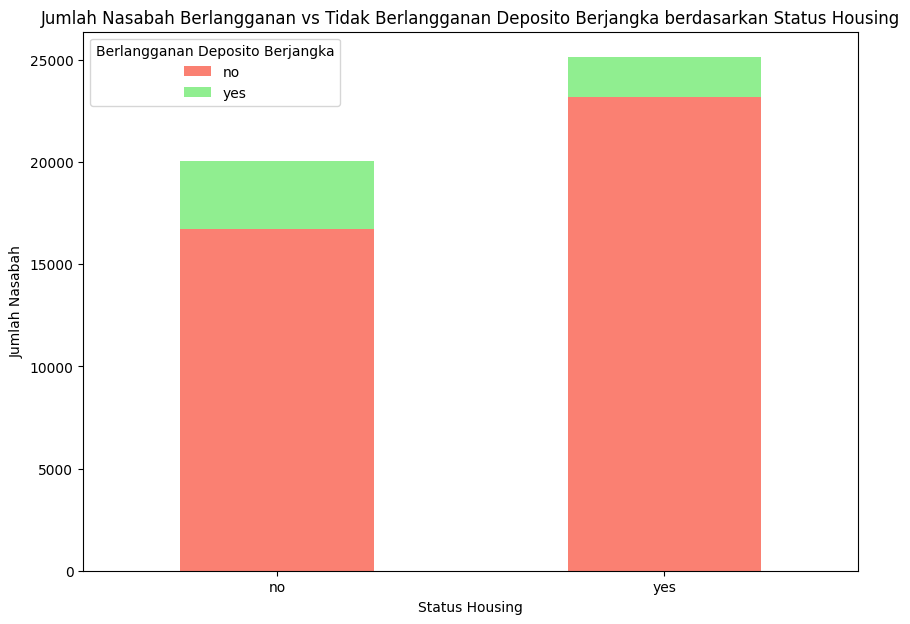

Chi-Square Statistic: 874.822448867983
p-value: 2.918797605076633e-192
Degrees of Freedom: 1
Expected Frequencies:
[[17731.82813917  2349.17186083]
 [22190.17186083  2939.82813917]]
Tolak H0 (Ada hubungan yang signifikan antara housing dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap status housing
housing_y_counts = df.groupby(['housing', 'y']).size().unstack()

# Membuat grafik batang
housing_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Status Housing')
plt.xlabel('Status Housing')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['housing'], df['y'])

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Memeriksa hasil hipotesis nol
if p > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara housing dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara housing dan y)')


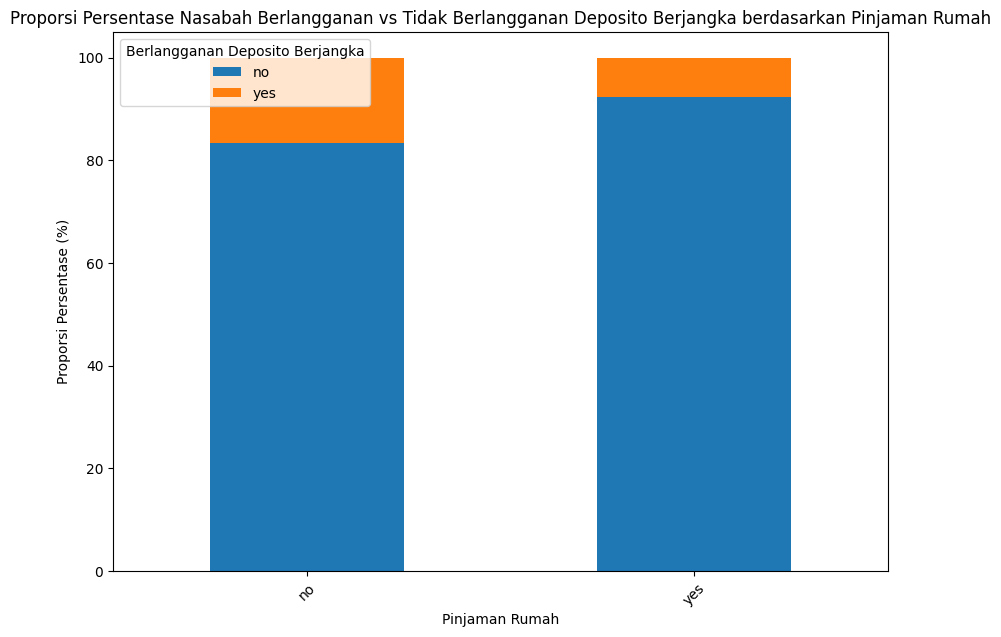

y           no    yes
housing              
no       83.3%  16.7%
yes      92.3%   7.7%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
housing_y_percentages = housing_y_counts.div(housing_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
housing_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Pinjaman Rumah')
plt.xlabel('Pinjaman Rumah')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
housing_y_percentages =housing_y_counts.div(housing_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
housing_y_percentages = housing_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(housing_y_percentages.to_string())


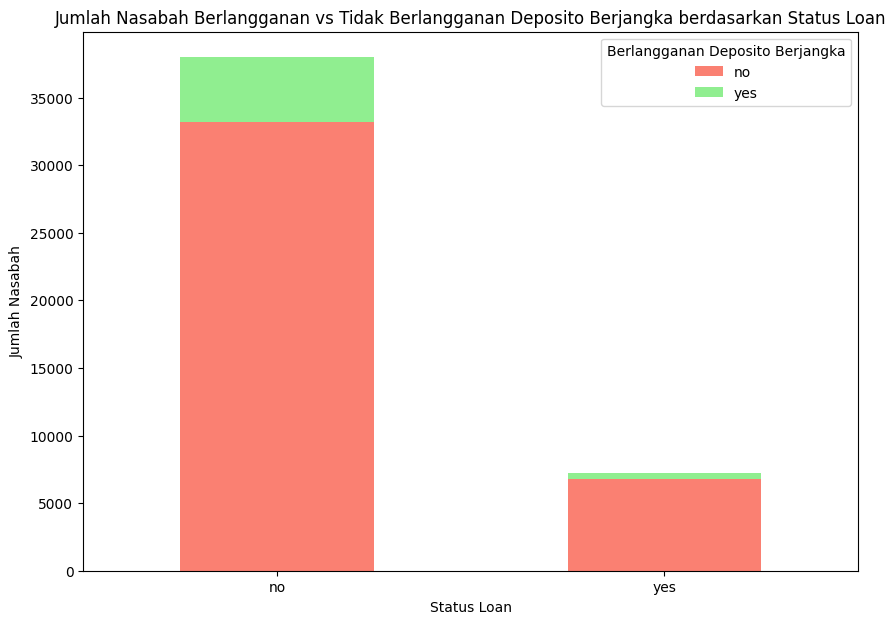

Chi-Square Statistic: 209.61698034978633
p-value: 1.665061163492756e-47
Degrees of Freedom: 1
Expected Frequencies:
[[33525.4379244  4441.5620756]
 [ 6396.5620756   847.4379244]]
Tolak H0 (Ada hubungan yang signifikan antara loan dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap status loan
loan_y_counts = df.groupby(['loan', 'y']).size().unstack()

# Membuat grafik batang
loan_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Status Loan')
plt.xlabel('Status Loan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table_loan = pd.crosstab(df['loan'], df['y'])

# Melakukan uji chi-square
chi2_loan, p_loan, dof_loan, expected_loan = chi2_contingency(contingency_table_loan)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2_loan}')
print(f'p-value: {p_loan}')
print(f'Degrees of Freedom: {dof_loan}')
print('Expected Frequencies:')
print(expected_loan)

# Memeriksa hasil hipotesis nol
if p_loan > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara loan dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara loan dan y)')


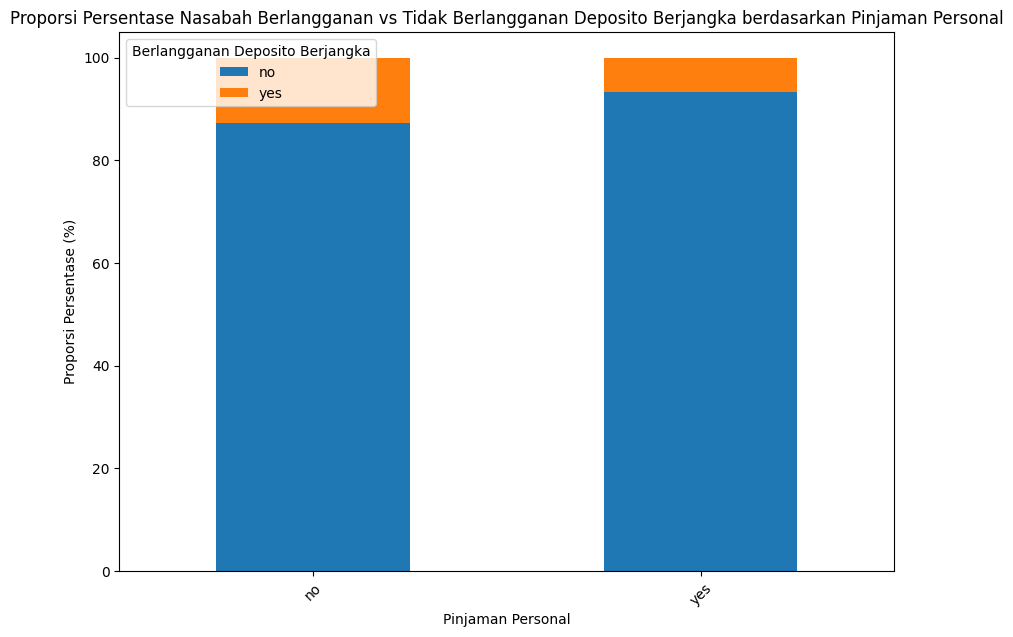

y        no    yes
loan              
no    87.3%  12.7%
yes   93.3%   6.7%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
loan_y_percentages = loan_y_counts.div(loan_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
loan_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Pinjaman Personal')
plt.xlabel('Pinjaman Personal')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
loan_y_percentages =loan_y_counts.div(loan_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
loan_y_percentages = loan_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(loan_y_percentages.to_string())


In [ ]:
df = df[df['contact'] != 'unknown']

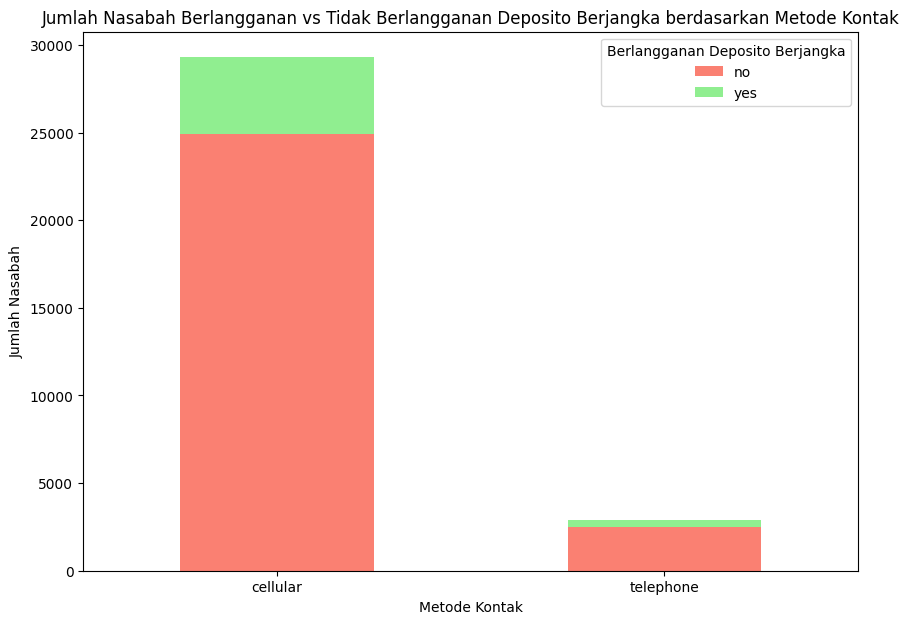

Chi-Square Statistic: 4.593240338277887
p-value: 0.03209827633501861
Degrees of Freedom: 1
Expected Frequencies:
[[24955.61243826  4329.38756174]
 [ 2476.38756174   429.61243826]]
Tolak H0 (Ada hubungan yang signifikan antara contact dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap metode kontak
contact_y_counts = df.groupby(['contact', 'y']).size().unstack()

# Membuat grafik batang
contact_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Metode Kontak')
plt.xlabel('Metode Kontak')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table_contact = pd.crosstab(df['contact'], df['y'])

# Melakukan uji chi-square
chi2_contact, p_contact, dof_contact, expected_contact = chi2_contingency(contingency_table_contact)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2_contact}')
print(f'p-value: {p_contact}')
print(f'Degrees of Freedom: {dof_contact}')
print('Expected Frequencies:')
print(expected_contact)

# Memeriksa hasil hipotesis nol
if p_contact > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara contact dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara contact dan y)')


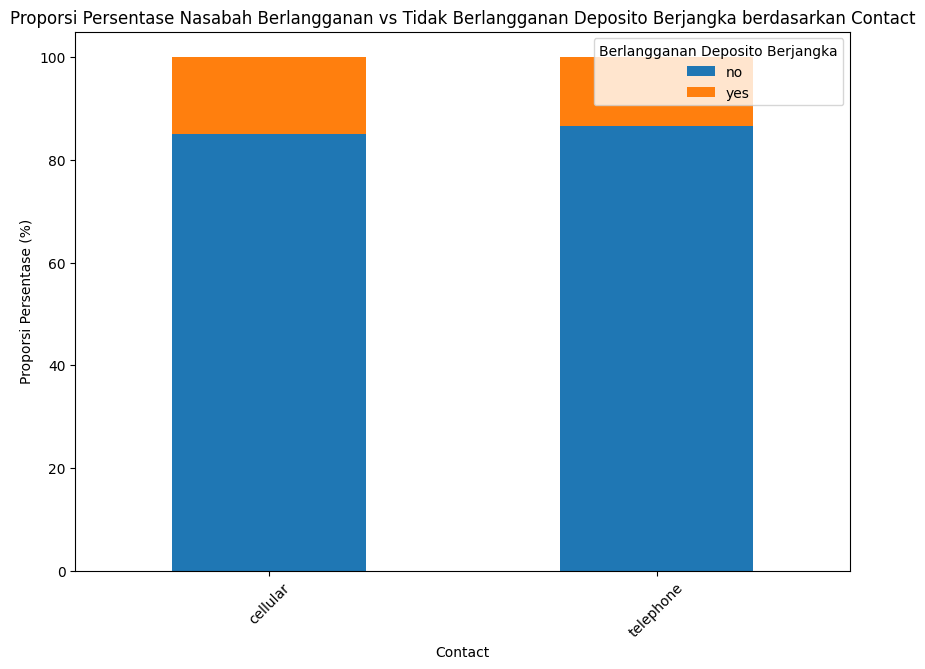

y             no    yes
contact                
cellular   85.1%  14.9%
telephone  86.6%  13.4%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
contact_y_percentages = contact_y_counts.div(contact_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
contact_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Contact')
plt.xlabel('Contact')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
contact_y_percentages =contact_y_counts.div(contact_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
contact_y_percentages = contact_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(contact_y_percentages.to_string())


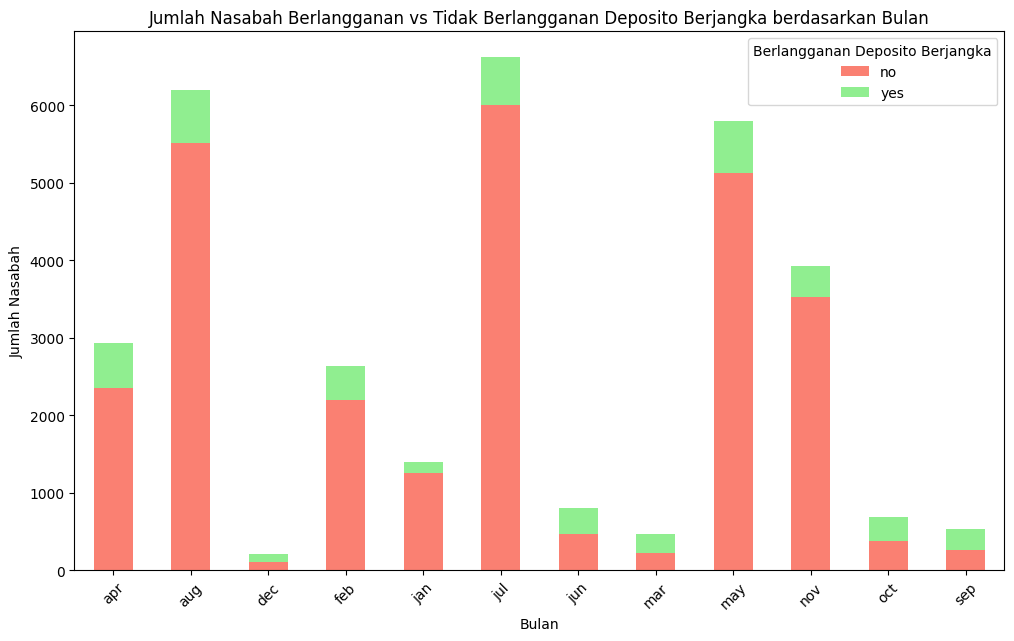

Chi-Square Statistic: 2608.289802976031
p-value: 0.0
Degrees of Freedom: 11
Expected Frequencies:
[[2493.43083471  432.56916529]
 [5280.0059644   915.9940356 ]
 [ 179.80652978   31.19347022]
 [2246.30337672  389.69662328]
 [1187.91612563  206.08387437]
 [5640.4711876   978.5288124 ]
 [ 689.40039141  119.59960859]
 [ 400.51691467   69.48308533]
 [4934.87968687  856.12031313]
 [3339.62933739  579.37066261]
 [ 586.28858998  101.71141002]
 [ 453.35106086   78.64893914]]
Tolak H0 (Ada hubungan yang signifikan antara bulan dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap bulan
month_y_counts = df.groupby(['month', 'y']).size().unstack()

# Membuat grafik batang
month_y_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table_month = pd.crosstab(df['month'], df['y'])

# Melakukan uji chi-square
chi2_month, p_month, dof_month, expected_month = chi2_contingency(contingency_table_month)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2_month}')
print(f'p-value: {p_month}')
print(f'Degrees of Freedom: {dof_month}')
print('Expected Frequencies:')
print(expected_month)

# Memeriksa hasil hipotesis nol
if p_month > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara bulan dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara bulan dan y)')


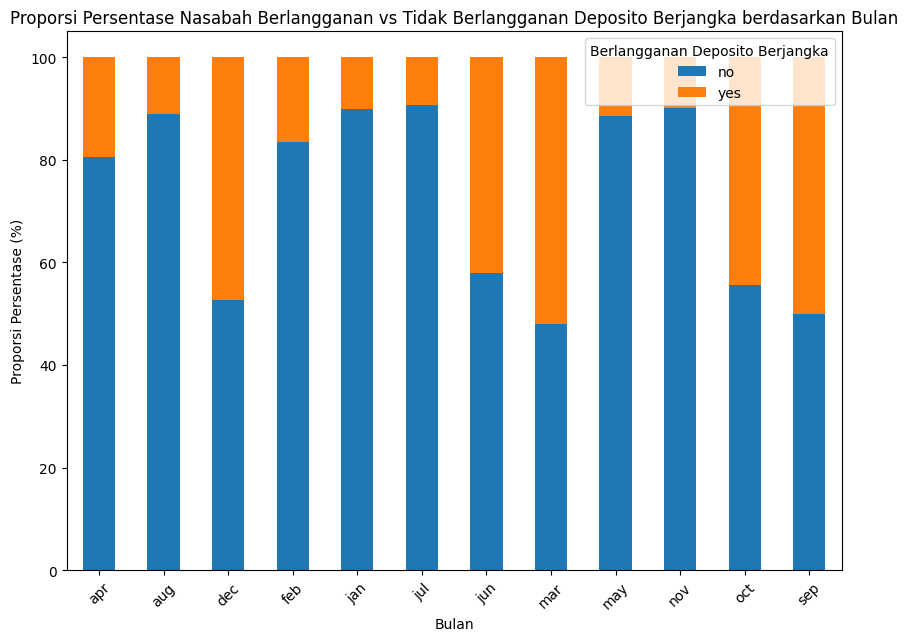

y         no    yes
month              
apr    80.5%  19.5%
aug    89.0%  11.0%
dec    52.6%  47.4%
feb    83.4%  16.6%
jan    89.9%  10.1%
jul    90.7%   9.3%
jun    58.0%  42.0%
mar    48.1%  51.9%
may    88.5%  11.5%
nov    90.0%  10.0%
oct    55.5%  44.5%
sep    50.0%  50.0%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
month_y_percentages = month_y_counts.div(month_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
month_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
month_y_percentages =month_y_counts.div(month_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
month_y_percentages = month_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(month_y_percentages.to_string())


In [ ]:
# Fungsi untuk mengubah nilai kolom 'day' menjadi kategori minggu
def categorize_week(day):
    if 1 <= day <= 7:
        return 'week 1'
    elif 8 <= day <= 14:
        return 'week 2'
    elif 15 <= day <= 21:
        return 'week 3'
    elif 22 <= day <= 32:
        return 'week 4'
    else :
        return 'undefined'

# Mengubah nilai kolom 'day' sesuai kriteria yang ditentukan
df['day'] = df['day'].apply(categorize_week)


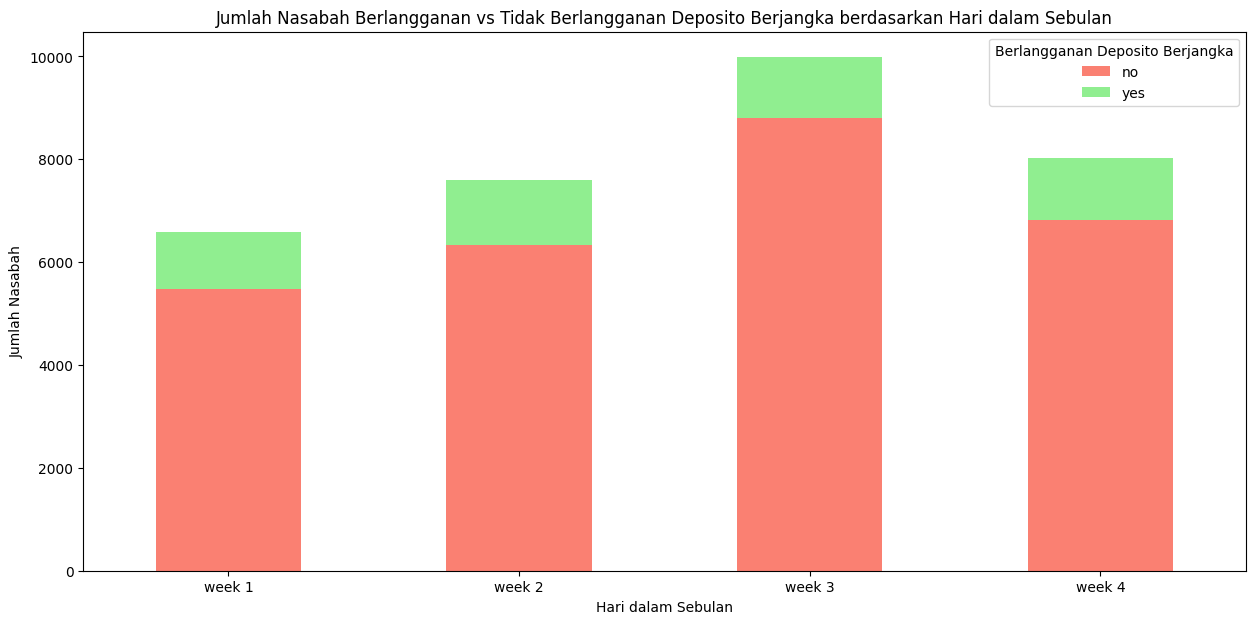

Chi-Square Statistic: 115.40458692519098
p-value: 7.53319920881857e-25
Degrees of Freedom: 3
Expected Frequencies:
[[5617.4627691   974.5372309 ]
 [6473.88723556 1123.11276444]
 [8506.29753658 1475.70246342]
 [6834.35245876 1185.64754124]]
Tolak H0 (Ada hubungan yang signifikan antara minggu dalam sebulan dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap hari dalam sebulan
day_y_counts = df.groupby(['day', 'y']).size().unstack()

# Membuat grafik batang
day_y_counts.plot(kind='bar', stacked=True, figsize=(15, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Hari dalam Sebulan')
plt.xlabel('Hari dalam Sebulan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table_day = pd.crosstab(df['day'], df['y'])

# Melakukan uji chi-square
chi2_day, p_day, dof_day, expected_day = chi2_contingency(contingency_table_day)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2_day}')
print(f'p-value: {p_day}')
print(f'Degrees of Freedom: {dof_day}')
print('Expected Frequencies:')
print(expected_day)

# Memeriksa hasil hipotesis nol
if p_day > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara minggu dalam sebulan dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara minggu dalam sebulan dan y)')


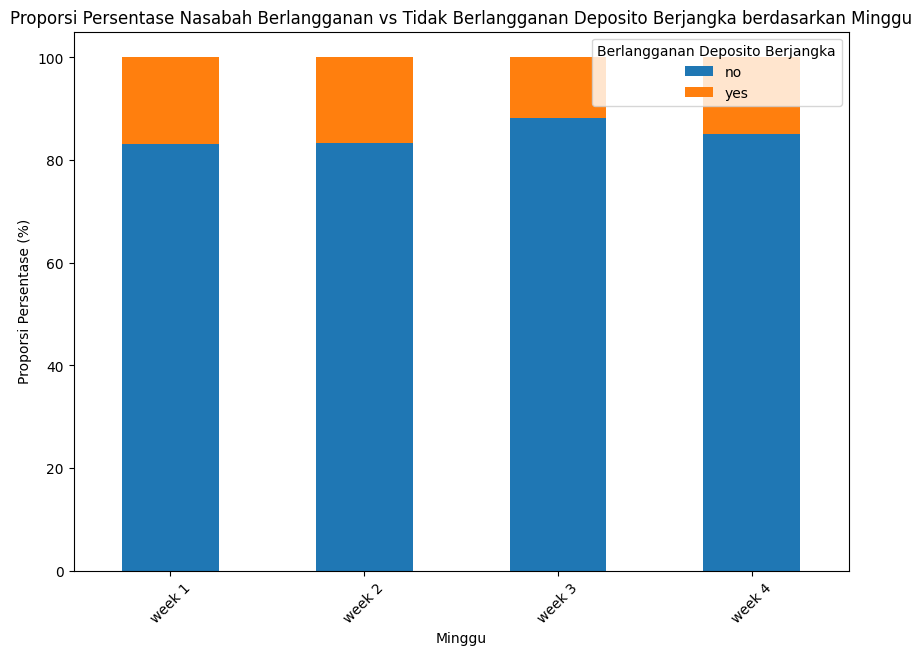

y          no    yes
day                 
week 1  83.1%  16.9%
week 2  83.3%  16.7%
week 3  88.2%  11.8%
week 4  85.0%  15.0%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
day_y_percentages = day_y_counts.div(day_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
day_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Minggu')
plt.xlabel('Minggu')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
day_y_percentages =day_y_counts.div(day_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
day_y_percentages = day_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(day_y_percentages.to_string())


In [ ]:
df['poutcome'] = df['poutcome'].replace('unknown', 'other')

In [ ]:
df = df[df['poutcome'] != 'other']

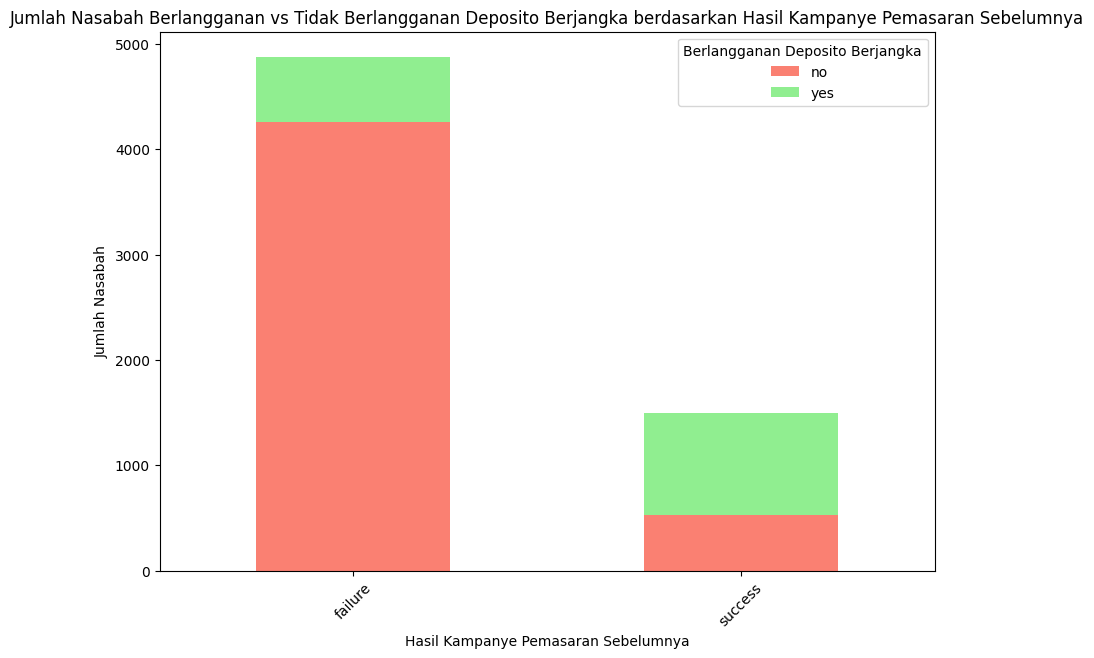

Chi-Square Statistic: 1680.2695499648687
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[3654.985084 1215.014916]
 [1125.014916  373.985084]]
Tolak H0 (Ada hubungan yang signifikan antara hasil kampanye pemasaran sebelumnya dan y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Menghitung jumlah nasabah yang berlangganan dan tidak berlangganan deposito berjangka untuk setiap hasil kampanye pemasaran sebelumnya
poutcome_y_counts = df.groupby(['poutcome', 'y']).size().unstack()

# Membuat grafik batang
poutcome_y_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['salmon', 'lightgreen'])

# Menambahkan judul dan label sumbu
plt.title('Jumlah Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Hasil Kampanye Pemasaran Sebelumnya')
plt.xlabel('Hasil Kampanye Pemasaran Sebelumnya')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Langkah 2: Uji Chi-Square
# Membuat tabel kontingensi
contingency_table_poutcome = pd.crosstab(df['poutcome'], df['y'])

# Melakukan uji chi-square
chi2_poutcome, p_poutcome, dof_poutcome, expected_poutcome = chi2_contingency(contingency_table_poutcome)

# Menampilkan hasil uji chi-square
print(f'Chi-Square Statistic: {chi2_poutcome}')
print(f'p-value: {p_poutcome}')
print(f'Degrees of Freedom: {dof_poutcome}')
print('Expected Frequencies:')
print(expected_poutcome)

# Memeriksa hasil hipotesis nol
if p_poutcome > 0.05:
    print('Terima H0 (Tidak ada hubungan yang signifikan antara hasil kampanye pemasaran sebelumnya dan y)')
else:
    print('Tolak H0 (Ada hubungan yang signifikan antara hasil kampanye pemasaran sebelumnya dan y)')



In [ ]:
#df['poutcome'] = df['poutcome'].replace('other', 'failure')

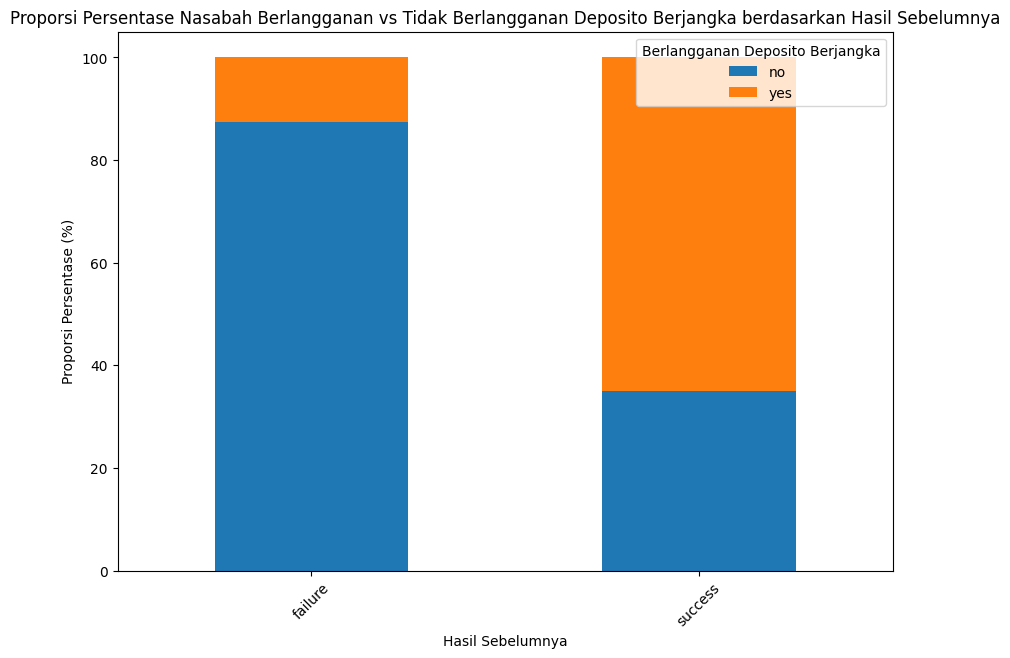

y            no    yes
poutcome              
failure   87.4%  12.6%
success   35.0%  65.0%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung proporsi persentase
poutcome_y_percentages = poutcome_y_counts.div(poutcome_y_counts.sum(axis=1), axis=0) * 100

# Membuat grafik batang
poutcome_y_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Proporsi Persentase Nasabah Berlangganan vs Tidak Berlangganan Deposito Berjangka berdasarkan Hasil Sebelumnya')
plt.xlabel('Hasil Sebelumnya')
plt.ylabel('Proporsi Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan Deposito Berjangka')

# Menampilkan grafik
plt.show()

# Menghitung proporsi persentase
poutcome_y_percentages =poutcome_y_counts.div(poutcome_y_counts.sum(axis=1), axis=0) * 100

# Mengubah DataFrame menjadi format persentase
poutcome_y_percentages = poutcome_y_percentages.applymap('{:.1f}%'.format)

# Menampilkan tabel
print(poutcome_y_percentages.to_string())


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 24060 to 45208
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6369 non-null   int64 
 1   job        6369 non-null   object
 2   marital    6369 non-null   object
 3   education  6369 non-null   object
 4   default    6369 non-null   object
 5   balance    6369 non-null   int64 
 6   housing    6369 non-null   object
 7   loan       6369 non-null   object
 8   contact    6369 non-null   object
 9   day        6369 non-null   object
 10  month      6369 non-null   object
 11  campaign   6369 non-null   int64 
 12  pdays      6369 non-null   int64 
 13  previous   6369 non-null   int64 
 14  poutcome   6369 non-null   object
 15  y          6369 non-null   object
dtypes: int64(5), object(11)
memory usage: 845.9+ KB


In [ ]:
# Mengubah nilai pada kolom 'balance' menjadi nilai absolut
df['balance'] = df['balance'].abs()

# Menampilkan lima baris pertama dari train_data untuk memastikan perubahan berhasil dilakukan
print(df.head())


       age         job   marital  education default  balance housing loan  \
24060   33      admin.   married   tertiary      no      882      no   no   
24064   33    services   married  secondary      no     3444     yes   no   
24077   36  management   married   tertiary      no        0     yes   no   
24127   51      admin.    single  secondary      no     3132      no   no   
24151   33  unemployed  divorced  secondary      no     1005     yes   no   

         contact     day month  campaign  pdays  previous poutcome    y  
24060  telephone  week 3   oct         1    151         3  failure   no  
24064  telephone  week 3   oct         1     91         4  failure  yes  
24077  telephone  week 4   oct         1    143         3  failure  yes  
24127  telephone  week 1   nov         1    176         1  failure   no  
24151  telephone  week 2   nov         1    174         2  failure   no  


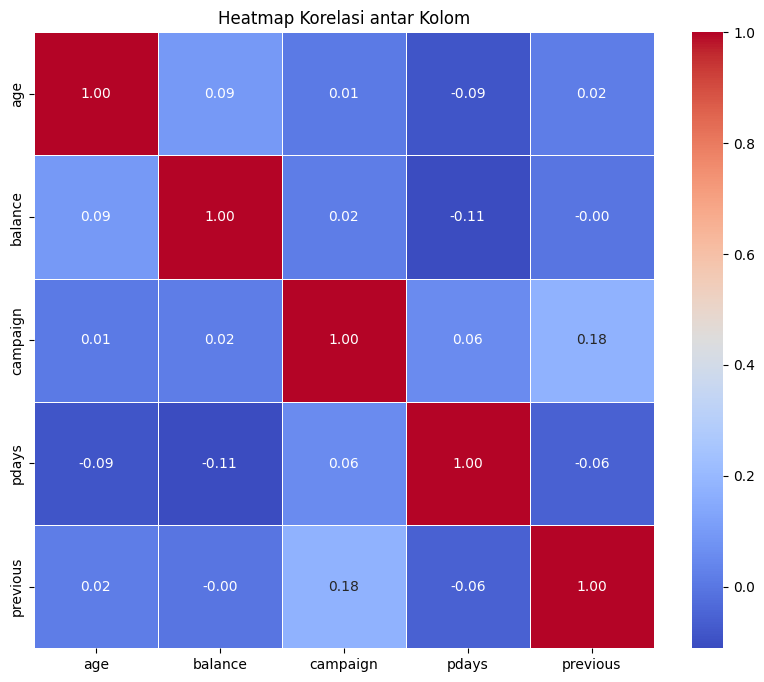

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom yang akan digunakan
selected_columns = ['age', 'balance', 'campaign', 'pdays', 'previous']

# Mengambil subset data dengan kolom yang dipilih
subset_data = df[selected_columns]

# Menghitung korelasi antar kolom
correlation_matrix = subset_data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,week 3,oct,1,151,3,failure,no
24064,33,services,married,secondary,no,3444,yes,no,telephone,week 3,oct,1,91,4,failure,yes
24077,36,management,married,tertiary,no,0,yes,no,telephone,week 4,oct,1,143,3,failure,yes
24127,51,admin.,single,secondary,no,3132,no,no,telephone,week 1,nov,1,176,1,failure,no
24151,33,unemployed,divorced,secondary,no,1005,yes,no,telephone,week 2,nov,1,174,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,week 3,nov,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,week 3,nov,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,week 3,nov,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,week 3,nov,1,40,8,failure,yes


In [ ]:
import pandas as pd

# Misalkan df adalah DataFrame Anda
# Ubah nilai pada kolom pdays
df['contacted'] = df['pdays'].apply(lambda x: 'no' if x == -1 else 'yes')

# Hapus kolom pdays yang lama jika tidak diperlukan lagi
df.drop(columns=['pdays'], inplace=True)
df.drop(columns=['previous'], inplace=True)

print(df)


       age         job   marital  education default  balance housing loan  \
24060   33      admin.   married   tertiary      no      882      no   no   
24064   33    services   married  secondary      no     3444     yes   no   
24077   36  management   married   tertiary      no        0     yes   no   
24127   51      admin.    single  secondary      no     3132      no   no   
24151   33  unemployed  divorced  secondary      no     1005     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
45194   59  management   married   tertiary      no      138     yes  yes   
45195   68     retired   married  secondary      no     1146      no   no   
45201   53  management   married   tertiary      no      583      no   no   
45204   73     retired   married  secondary      no     2850      no   no   
45208   72     retired   married  secondary      no     5715      no   no   

         contact     day month  campaign poutcome    y contacted  
24060  t

In [ ]:
# Mengganti nilai 'yes' menjadi 1 dan 'no' menjadi 0 dalam kolom 'y'
df['y'] = df['y'].replace({'yes': 1, 'no': 0})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 24060 to 45208
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6369 non-null   int64 
 1   job        6369 non-null   object
 2   marital    6369 non-null   object
 3   education  6369 non-null   object
 4   default    6369 non-null   object
 5   balance    6369 non-null   int64 
 6   housing    6369 non-null   object
 7   loan       6369 non-null   object
 8   contact    6369 non-null   object
 9   day        6369 non-null   object
 10  month      6369 non-null   object
 11  campaign   6369 non-null   int64 
 12  poutcome   6369 non-null   object
 13  y          6369 non-null   int64 
 14  contacted  6369 non-null   object
dtypes: int64(4), object(11)
memory usage: 796.1+ KB


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,y,contacted
24060,33,admin.,married,tertiary,no,882,no,no,telephone,week 3,oct,1,failure,0,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,week 3,oct,1,failure,1,yes
24077,36,management,married,tertiary,no,0,yes,no,telephone,week 4,oct,1,failure,1,yes
24127,51,admin.,single,secondary,no,3132,no,no,telephone,week 1,nov,1,failure,0,yes
24151,33,unemployed,divorced,secondary,no,1005,yes,no,telephone,week 2,nov,1,failure,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,week 3,nov,2,failure,0,yes
45195,68,retired,married,secondary,no,1146,no,no,cellular,week 3,nov,1,success,1,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,week 3,nov,1,success,1,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,week 3,nov,1,failure,1,yes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label
X = df.drop(columns=['y'])  # Fitur
y = df['y']                 # Label

# Memisahkan data menjadi data latih (train data) dan data uji (test data) dengan perbandingan 70:30
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan jumlah data pada setiap bagian
print("Jumlah data latih:", len(X_train_val))
print("Jumlah data uji:", len(X_test))



Jumlah data latih: 4458
Jumlah data uji: 1911


In [ ]:
X_train_val.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
poutcome     0
contacted    0
dtype: int64

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectPercentile, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve, confusion_matrix, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 24060 to 45208
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6369 non-null   int64 
 1   job        6369 non-null   object
 2   marital    6369 non-null   object
 3   education  6369 non-null   object
 4   default    6369 non-null   object
 5   balance    6369 non-null   int64 
 6   housing    6369 non-null   object
 7   loan       6369 non-null   object
 8   contact    6369 non-null   object
 9   day        6369 non-null   object
 10  month      6369 non-null   object
 11  campaign   6369 non-null   int64 
 12  poutcome   6369 non-null   object
 13  y          6369 non-null   int64 
 14  contacted  6369 non-null   object
dtypes: int64(4), object(11)
memory usage: 796.1+ KB


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN


one_hot_cols = X[['job','marital','education','contact','day','month','poutcome','contacted']].columns
label_cols = X[['default','housing','loan']].columns
numeric_cols = X.select_dtypes(exclude='object').columns
logit = LogisticRegression(random_state=42)
smote = SMOTE(random_state=42)

logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', RobustScaler())
])

# for all object columns
logit_pipe_label = Pipeline([
    ('label', OrdinalEncoder()),
])

logit_pipe_onehot = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, numeric_cols),
    ('pipe_onehot', logit_pipe_label, label_cols),
    ('pipe_label', logit_pipe_onehot, one_hot_cols)
])

# combine all pipeline
logit_pipe_combine = ImbPipeline([
    ('transformer', logit_transformer),
    ('resampling', SMOTEENN(random_state=42)),
    ('logit', logit)
])

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline


# Inisialisasi RandomForestClassifier dengan parameter yang diinginkan
rf = RandomForestClassifier(max_depth=7, min_samples_split=10, random_state=42)

one_hot_cols = X[['job','marital','education','contact','day','month','poutcome','contacted']].columns
label_cols = X[['default','housing','loan']].columns
numeric_cols = X.select_dtypes(exclude='object').columns
# Inisialisasi SMOTE dengan random_state yang diinginkan
smote = SMOTE(random_state=42)

# Pipeline untuk kolom numerik
rf_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', RobustScaler())
])

# Pipeline untuk kolom kategori dengan one-hot encoding
rf_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

# Pipeline untuk kolom label dengan ordinal encoding
rf_pipe_label = Pipeline([
    ('label', OrdinalEncoder()),
])

# ColumnTransformer untuk menggabungkan semua pipeline berdasarkan tipe kolom
rf_transformer = ColumnTransformer([
    ('pipe_num', rf_pipe_num, numeric_cols),
    ('pipe_cat', rf_pipe_cat, one_hot_cols),
    ('pipe_label', rf_pipe_label, label_cols)
])

# Pipeline gabungan yang mengkombinasikan ColumnTransformer dan RandomForestClassifier
rf_pipe_combine = ImbPipeline([
    ('transformer', rf_transformer),
    ('resampling', SMOTEENN(random_state=42)),
    ('rf', rf)
])


In [ ]:
xgb_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
    # You may add more preprocessing steps specific to XGBoost here if needed
])

xgb_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

xgb_pipe_label = Pipeline([
    ('label', OrdinalEncoder()),
])

# Assuming numeric_cols and one_hot_cols are defined earlier
xgb_transformer = ColumnTransformer([
    ('pipe_num', xgb_pipe_num, numeric_cols),
    ('pipe_cat', xgb_pipe_cat, one_hot_cols),
    ('pipe_label', xgb_pipe_label, label_cols)
])



# Create the XGBoost pipeline
xgb_pipe_combine = ImbPipeline([
    ('transformer', xgb_transformer),
    ('resampling', SMOTEENN(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
])

In [ ]:
numeric_cols, one_hot_cols

(Index(['age', 'balance', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome'], dtype='object'))

In [ ]:
skf = StratifiedKFold(n_splits=5)

logit_score = cross_val_score(logit_pipe_combine, X_train_val, y_train_val, scoring='recall', cv=skf)

In [ ]:
skf = StratifiedKFold(n_splits=5)
xgb_scores = cross_val_score(xgb_pipe_combine, X_train_val, y_train_val, cv=skf, scoring='recall')

In [ ]:
skf = StratifiedKFold(n_splits=5)
rf_scores = cross_val_score(rf_pipe_combine, X_train_val, y_train_val, cv=skf, scoring='recall')

In [ ]:
logit_score

array([0.79910714, 0.80444444, 0.81777778, 0.79910714, 0.84375   ])

In [ ]:
rf_scores

array([0.77232143, 0.76      , 0.79111111, 0.80357143, 0.79017857])

In [ ]:
xgb_scores

array([0.66517857, 0.59555556, 0.61777778, 0.62053571, 0.61160714])

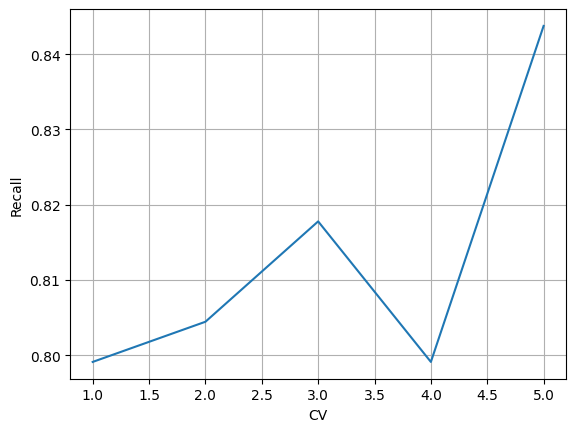

Logit Val Score: 0.8128373015873016


In [ ]:
plt.plot(range(1, len(logit_score)+1), logit_score)
plt.xlabel('CV')
plt.ylabel('Recall')
plt.grid()
plt.show()
print('Logit Val Score:', logit_score.mean())

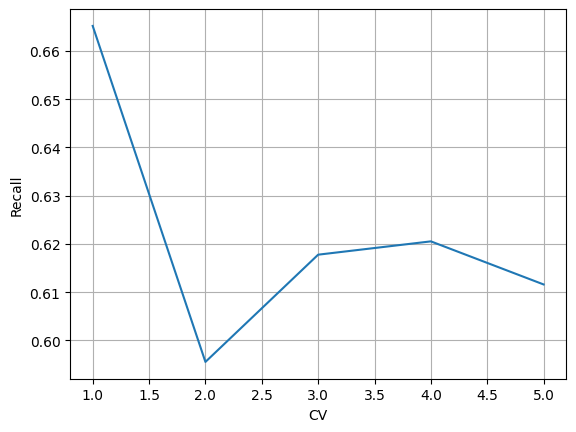

Xgb Val Scores: 0.6221309523809524


In [ ]:
plt.plot(range(1, len(xgb_scores)+1), xgb_scores)
plt.xlabel('CV')
plt.ylabel('Recall')
plt.grid()
plt.show()
print('Xgb Val Scores:', xgb_scores.mean())

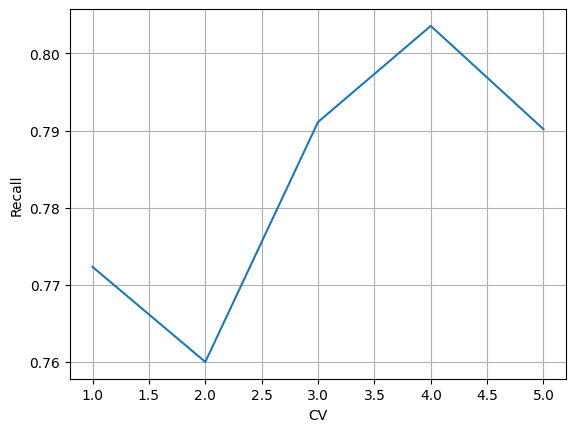

rf Val Scores: 0.783436507936508


In [ ]:
plt.plot(range(1, len(rf_scores)+1), rf_scores)
plt.xlabel('CV')
plt.ylabel('Recall')
plt.grid()
plt.show()
print('rf Val Scores:', rf_scores.mean())

In [ ]:
logit_pipe_combine.fit(X_train_val, y_train_val)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['age', 'balance', 'campaign'], dtype='object')),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  Index(['default', 'housing', 'loan'], dtype='object')),
                                                 ('pipe_label',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome',
       'contacted'],
      dtype='object'))])),
                ('resampling', SMOTEENN(random_state=42)),
                ('logit', LogisticRegression(random_state=42))])

In [ ]:
xgb_pipe_combine.fit(X_train_val, y_train_val)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['age', 'balance', 'campaign'], dtype='object')),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome',
       'contacted'],
      dtype='o...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
rf_pipe_combine.fit(X_train_val, y_train_val)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['age', 'balance', 'campaign'], dtype='object')),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome',
       'contacted'],
      dtype='object')),
                                                 ('pipe_label',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  Index(['default', 'housing', 'loan'], dtype='object'))])),
                ('resampling', SMOTEENN(random_state=42)),
                ('rf',
                 RandomForestClassifier(max_depth=7, min_samples_split=10,
                                        random_state=42))])

In [ ]:
recall_score(y_test,logit_pipe_combine.predict(X_test))

0.8479657387580299

In [ ]:
recall_score(y_train_val,logit_pipe_combine.predict(X_train_val))

0.8163992869875223

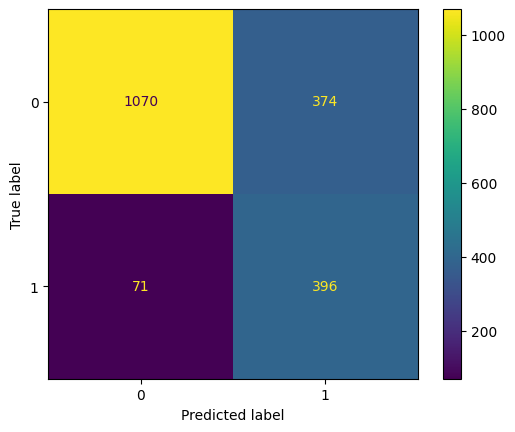

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1444
           1       0.51      0.85      0.64       467

    accuracy                           0.77      1911
   macro avg       0.73      0.79      0.73      1911
weighted avg       0.83      0.77      0.78      1911



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



# Fitting the pipeline on the training data
logit_pipe_combine.fit(X_train_val, y_train_val)

# Predicting the target variable on the test data
y_pred = logit_pipe_combine.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logit.classes_)
disp.plot()
plt.show()

# Printing classification report for more detailed metrics
print(classification_report(y_test, y_pred))


In [ ]:
recall_score(y_test,rf_pipe_combine.predict(X_test))

0.8179871520342612

In [ ]:
recall_score(y_train_val,rf_pipe_combine.predict(X_train_val))

0.8048128342245989

In [ ]:
recall_score(y_test,xgb_pipe_combine.predict(X_test))

0.7109207708779444

In [ ]:
recall_score(y_train_val,xgb_pipe_combine.predict(X_train_val))

0.7869875222816399

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define the parameter distribution for logistic regression
param_dist_lr = {
    'logit__C': loguniform(1e-6, 1),
    'logit__penalty': ['l1', 'l2']
}



# Perform Random Search with cross-validation
random_search_lr = RandomizedSearchCV(logit_pipe_combine, param_dist_lr, n_iter=50, cv=skf, scoring='recall', random_state=42)
random_search_lr.fit(X_train_val, y_train_val)
# Best parameters and best score
best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_

print("Best parameters for Logistic Regression:", best_params_lr)
print("Best recall score for Logistic Regression:", best_score_lr)


Best parameters for Logistic Regression: {'logit__C': 1.2606912518374076e-05, 'logit__penalty': 'l2'}
Best recall score for Logistic Regression: 1.0


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler


# Update the pipeline with the best parameters
best_logit_pipe_combine = ImbPipeline([
    ('transformer', ColumnTransformer([
        ('pipe_num', Pipeline([
            ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
            ('scaler', RobustScaler())
        ]), numeric_cols),
        ('pipe_onehot', Pipeline([
            ('onehot', OneHotEncoder(drop='first'))
        ]), one_hot_cols),
        ('pipe_label', Pipeline([
            ('label', OrdinalEncoder())
        ]), label_cols)
    ])),
    ('resampling', SMOTEENN(random_state=42)),
    ('logit', LogisticRegression(
        random_state=42,
        C=best_params_lr['logit__C'],
        penalty=best_params_lr['logit__penalty'],
    ))
])

# Fit the new pipeline to the data
best_logit_pipe_combine.fit(X_train_val, y_train_val)

# Now you can use this fitted pipeline to make predictions or further evaluations


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['age', 'balance', 'campaign'], dtype='object')),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome',
       'contacted'],
      dtype='object')),
                                                 ('pipe_label',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  Index(['default', 'housing', 'loan'], dtype='object'))])),
                ('resampling', SMOTEENN(random_state=42)),
                ('logit',
                 LogisticRegression(C=0.00011527987128232407,
                                    random_state=42))])

In [ ]:
recall_score(y_test,best_logit_pipe_combine.predict(X_test))

0.9978586723768736

In [ ]:
recall_score(y_train_val,best_logit_pipe_combine.predict(X_train_val))

0.9982174688057041

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for random forest
param_dist_rf = {
    'rf__n_estimators': [int(x) for x in range(100, 1100, 100)],
    'rf__max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}



# Perform Random Search with cross-validation
random_search_rf = RandomizedSearchCV(rf_pipe_combine, param_dist_rf, n_iter=100, cv=5, scoring='recall', random_state=42)
random_search_rf.fit(X_train_val, y_train_val)

# Best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best recall score for Random Forest:", best_score_rf)


Best parameters for Random Forest: {'rf__n_estimators': 200, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_depth': 10, 'rf__bootstrap': True}
Best recall score for Random Forest: 0.7807658730158731


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

rf = RandomForestClassifier(random_state=42)

# Update the pipeline with the best parameters
best_rf_pipe_combine = ImbPipeline([
    ('transformer', ColumnTransformer([
        ('pipe_num', Pipeline([
            ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
            ('scaler', RobustScaler())
        ]), numeric_cols),
        ('pipe_onehot', Pipeline([
            ('onehot', OneHotEncoder(drop='first'))
        ]), one_hot_cols),
        ('pipe_label', Pipeline([
            ('label', OrdinalEncoder())
        ]), label_cols)
    ])),
    ('resampling', SMOTEENN(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42,
        n_estimators=best_params_rf['rf__n_estimators'],
        max_depth=best_params_rf['rf__max_depth'],
        min_samples_split=best_params_rf['rf__min_samples_split'],
        min_samples_leaf=best_params_rf['rf__min_samples_leaf'],
        bootstrap=best_params_rf['rf__bootstrap']

    ))
])

# Fit the new pipeline to the data
best_rf_pipe_combine.fit(X_train_val, y_train_val)

# Now you can use this fitted pipeline to make predictions or further evaluations


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['age', 'balance', 'campaign'], dtype='object')),
                                                 ('pipe_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome',
       'contacted'],
      dtype='object')),
                                                 ('pipe_label',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  Index(['default', 'housing', 'loan'], dtype='object'))])),
                ('resampling', SMOTEENN(random_state=42)),
                ('rf',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=200, random_state=42))])

In [ ]:
recall_score(y_train_val,best_rf_pipe_combine.predict(X_train_val))

0.8119429590017825

In [ ]:
recall_score(y_test,best_rf_pipe_combine.predict(X_test))

0.8072805139186295

In [ ]:
recall_score(y_train_val,xgb_pipe_combine.predict(X_train_val))

0.5358866103739445

In [ ]:
recall_score(y_test,rf_pipe_combine.predict(X_test))

0.6403326403326404

In [ ]:
recall_score(y_train_val,rf_pipe_combine.predict(X_train_val))

0.6613389626055488

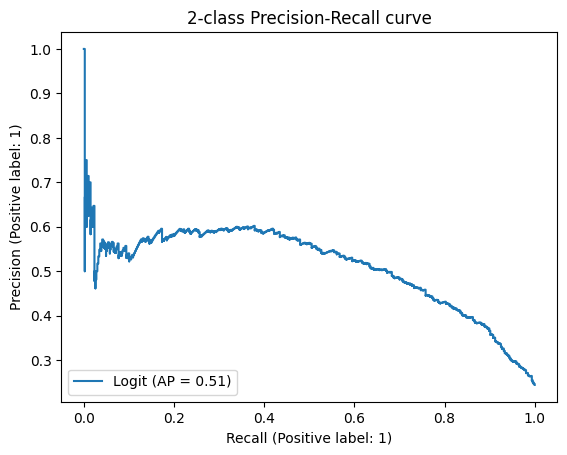

In [ ]:
display_ = PrecisionRecallDisplay.from_estimator(
    best_logit_pipe_combine, X_test, y_test, name="Logit")
_ = display_.ax_.set_title("2-class Precision-Recall curve")

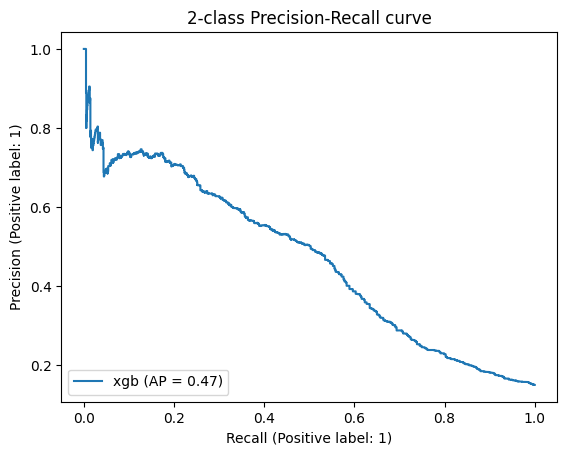

In [ ]:
display_xgb= PrecisionRecallDisplay.from_estimator(
    xgb_pipe_combine, X_test, y_test, name="xgb")
_ = display_xgb.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
y_scores = best_logit_pipe_combine.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test.values, y_scores)
df_thres = pd.DataFrame({'Precision': precision[:-1], 'Recall': recall[:-1], 'Threshold': thresholds})
df_thres

,Precision,Recall,Threshold
0,0.244375,1.000000,0.444059
1,0.244503,1.000000,0.463506
2,0.244631,1.000000,0.464410
3,0.244759,1.000000,0.465937
4,0.244887,1.000000,0.471619
...,...,...,...
1906,0.600000,0.006424,0.694296
1907,0.750000,0.006424,0.706327
1908,0.666667,0.004283,0.710166
1909,0.500000,0.002141,0.710387


In [ ]:
df_thres[df_thres['Recall'].between(.85, .90)]

,Precision,Recall,Threshold
940,0.432544,0.899358,0.283220
941,0.432990,0.899358,0.283672
942,0.433437,0.899358,0.284152
943,0.432851,0.897216,0.284537
944,0.433299,0.897216,0.284920
...,...,...,...
1131,0.508974,0.850107,0.505981
1132,0.509628,0.850107,0.509228
1133,0.510283,0.850107,0.511366
1134,0.510940,0.850107,0.511384


In [ ]:
pred_24 = np.where(y_scores>0.284, 1, 0)
recall_24 = recall_score(y_test,pred_24)
recall_24

0.8993576017130621

In [ ]:
pred_24 = np.where(y_scores>0.284, 1, 0)
recall_24 = precision_score(y_test,pred_24)
recall_24

In [ ]:
confusion_matrix(y_test, pred_24)

array([[895, 549],
       [ 47, 420]])